In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.4.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 72s 16us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

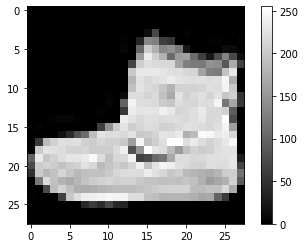

In [7]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.colormaps()
plt.show()

In [9]:
#scaling
train_images = train_images / 255.0

test_images = test_images / 255.0

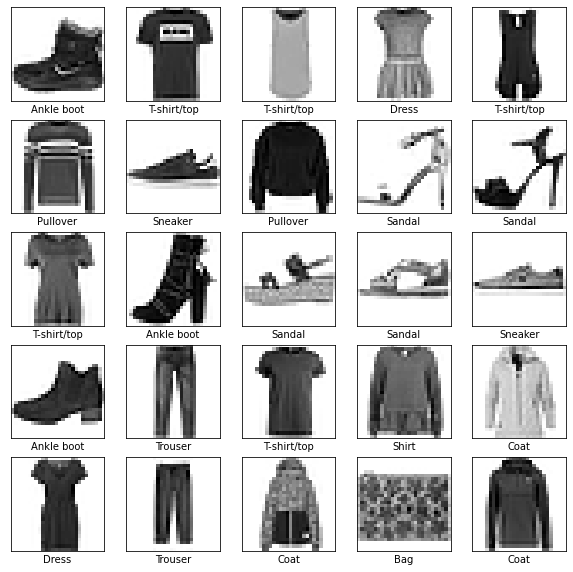

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [14]:
model.compile(
    optimizer='Adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 624us/step - loss: 0.6274 - accuracy: 0.7805
Epoch 2/10
1875/1875 [==============================] - 1s 605us/step - loss: 0.3851 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 1s 593us/step - loss: 0.3397 - accuracy: 0.8743
Epoch 4/10
1875/1875 [==============================] - 1s 608us/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 1s 592us/step - loss: 0.2947 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 1s 607us/step - loss: 0.2818 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.2680 - accuracy: 0.8993
Epoch 8/10
1875/1875 [==============================] - 1s 614us/step - loss: 0.2547 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 1s 621us/step - loss: 0.2455 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 1s 610u

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'\nTest Accuracy {test_acc}')

313/313 [==============================] - 0s 494us/step - loss: 0.3385 - accuracy: 0.8814

Test Accuracy 0.8813999891281128


In [19]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [20]:
predictions = probability_model.predict(test_images)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

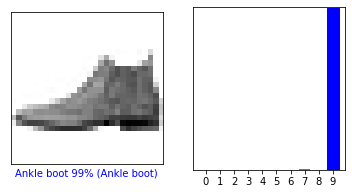

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

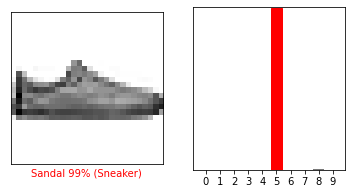

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

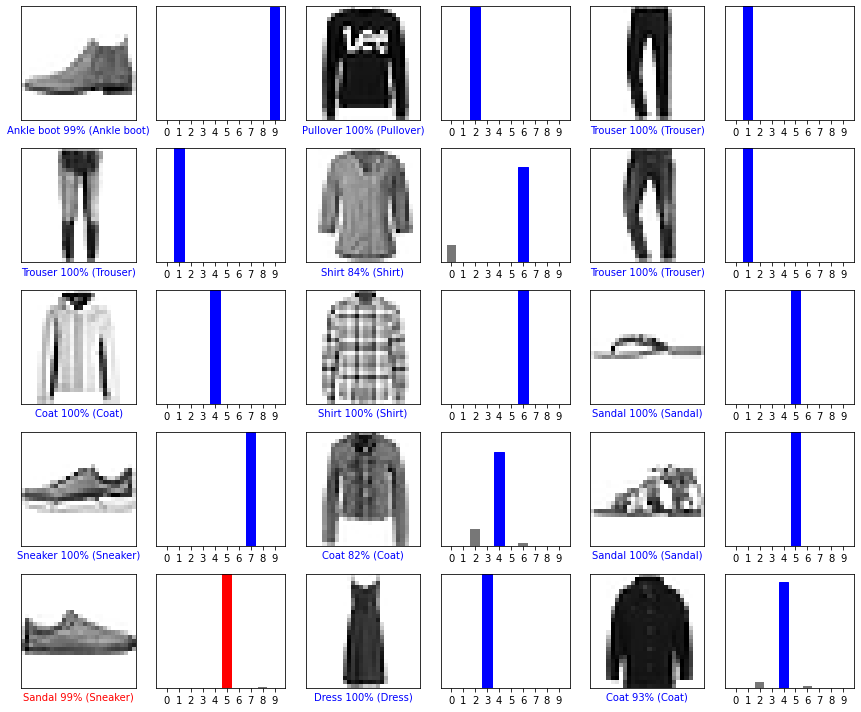

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)
(1, 28, 28)


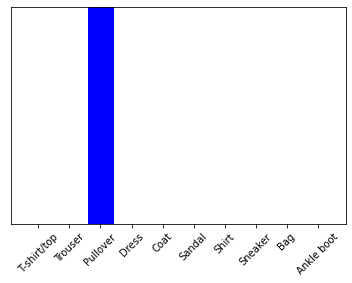

In [32]:
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = probability_model.predict(img)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

2

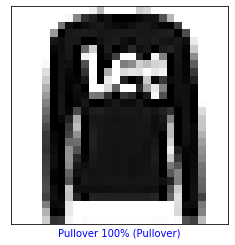

In [35]:
plot_image(1, predictions_single, test_labels, test_images)